# imports

In [2]:
import tensorflow as tf
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Input, Dropout
from tensorflow.keras import Sequential, layers, models

# plot

In [4]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(10, 5))
  # Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  pd.DataFrame(history.history).plot(figsize=(10, 7))


# open dataset

In [5]:
for dirpath, dirnames, filenames in os.walk("Coral Reef Images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'Coral Reef Images'.
There are 2 directories and 0 images in 'Coral Reef Images\test'.
There are 0 directories and 135 images in 'Coral Reef Images\test\Bleached'.
There are 0 directories and 122 images in 'Coral Reef Images\test\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\train'.
There are 0 directories and 1365 images in 'Coral Reef Images\train\Bleached'.
There are 0 directories and 1378 images in 'Coral Reef Images\train\Healthy'.
There are 2 directories and 0 images in 'Coral Reef Images\valid'.
There are 0 directories and 240 images in 'Coral Reef Images\valid\Bleached'.
There are 0 directories and 223 images in 'Coral Reef Images\valid\Healthy'.


In [6]:
# Another way to find out how many images are in a file
num_bleached_images_test = len(os.listdir("Coral Reef Images/test/Bleached"))
num_bleached_images_train = len(os.listdir("Coral Reef Images/train/Bleached"))

print(f"Number of bleached images in test set   : {num_bleached_images_test}")
print(f"Number of bleached images in train set  : {num_bleached_images_train}")
print(f"Total number of bleached images         : {num_bleached_images_test + num_bleached_images_train}")

Number of bleached images in test set   : 135
Number of bleached images in train set  : 1365
Total number of bleached images         : 1500


In [7]:
# Another way to find out how many images are in a file
num_healthy_images_test = len(os.listdir("Coral Reef Images/test/Healthy"))
num_healthy_images_train = len(os.listdir("Coral Reef Images/train/Healthy"))

print(f"Number of healthy images in test set    : {num_healthy_images_test}")
print(f"Number of healthy images in train set   : {num_healthy_images_train}")
print(f"Total number of healthy images          : {num_healthy_images_test + num_healthy_images_train}")

Number of healthy images in test set    : 122
Number of healthy images in train set   : 1378
Total number of healthy images          : 1500


In [8]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("Coral Reef Images/test/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Bleached' 'Healthy']


In [9]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("Coral Reef Images/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Bleached' 'Healthy']


# view image

In [10]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (640, 640, 3)


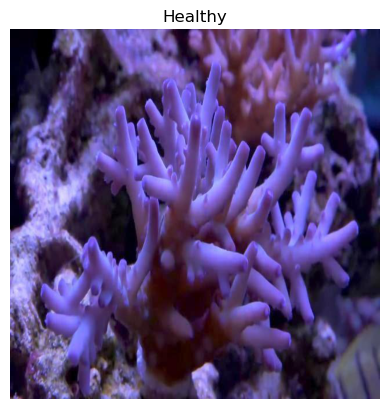

In [11]:
img = view_random_image(target_dir="Coral Reef Images/train/",target_class="Healthy")

In [12]:
img.shape

(640, 640, 3)

In [13]:
img

array([[[  0,   0,  10],
        [  0,   0,  10],
        [  0,   0,  10],
        ...,
        [ 19,  23,  70],
        [ 15,  19,  66],
        [ 13,  17,  64]],

       [[  0,   0,  10],
        [  0,   0,  10],
        [  0,   0,  10],
        ...,
        [ 19,  23,  70],
        [ 15,  19,  66],
        [ 13,  17,  64]],

       [[  0,   0,  10],
        [  0,   0,  10],
        [  0,   0,  10],
        ...,
        [ 19,  23,  70],
        [ 15,  19,  66],
        [ 13,  17,  64]],

       ...,

       [[ 74,  46,  60],
        [ 72,  46,  57],
        [ 58,  35,  43],
        ...,
        [ 83,  74,  95],
        [ 83,  74,  95],
        [ 83,  74,  93]],

       [[ 92,  64,  78],
        [ 93,  67,  78],
        [ 82,  59,  67],
        ...,
        [ 83,  74,  95],
        [ 83,  74,  93],
        [ 83,  74,  93]],

       [[103,  77,  90],
        [110,  84,  95],
        [102,  79,  87],
        ...,
        [ 83,  74,  95],
        [ 83,  74,  93],
        [ 83,  74,  93]]

In [14]:
# Get all the pixel values between 0 & 1
img/255.0

array([[[0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        ...,
        [0.0745098 , 0.09019608, 0.2745098 ],
        [0.05882353, 0.0745098 , 0.25882353],
        [0.05098039, 0.06666667, 0.25098039]],

       [[0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        ...,
        [0.0745098 , 0.09019608, 0.2745098 ],
        [0.05882353, 0.0745098 , 0.25882353],
        [0.05098039, 0.06666667, 0.25098039]],

       [[0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        [0.        , 0.        , 0.03921569],
        ...,
        [0.0745098 , 0.09019608, 0.2745098 ],
        [0.05882353, 0.0745098 , 0.25882353],
        [0.05098039, 0.06666667, 0.25098039]],

       ...,

       [[0.29019608, 0.18039216, 0.23529412],
        [0.28235294, 0.18039216, 0.22352941],
        [0.22745098, 0

# create model

In [15]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1/255.)
# valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "Coral Reef Images/train"
test_dir = "Coral Reef Images/test"
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator test instance without data augmentation
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 2743 images belonging to 2 classes.
Found 257 images belonging to 2 classes.
Found 2743 images belonging to 2 classes.


In [16]:
tf.random.set_seed(42)

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_1 = Sequential([
  Input(shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'), 
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dropout(0.5),
  Dense(1, activation='sigmoid')
])
# Compile model (same as model_4)
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\Acer-Swift\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 511ms/step - accuracy: 0.9078 - loss: 0.2484 - val_accuracy: 0.7198 - val_loss: 0.8402
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 46s 537ms/step - accuracy: 0.9774 - loss: 0.0730 - val_accuracy: 0.6693 - val_loss: 2.0400
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 561ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.6848 - val_loss: 1.6288
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 52s 603ms/step - accuracy: 0.9945 - loss: 0.0197 - val_accuracy: 0.6926 - val_loss: 1.9797
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 522ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.6887 - val_loss: 2.4930


In [ ]:
model_1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: >

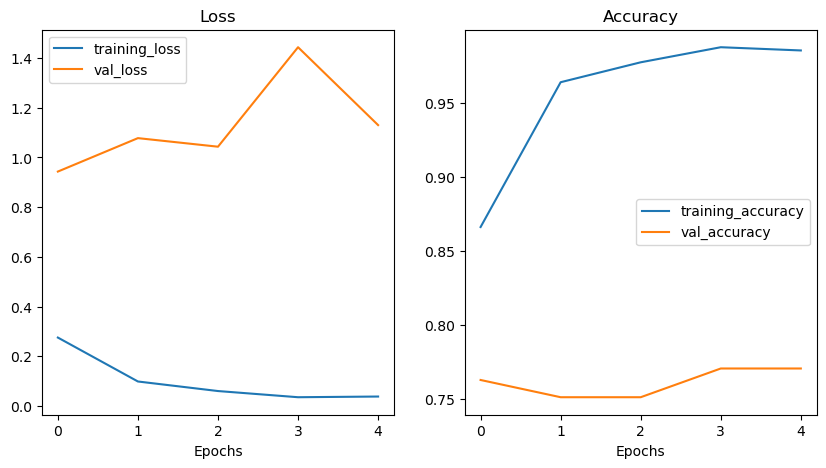

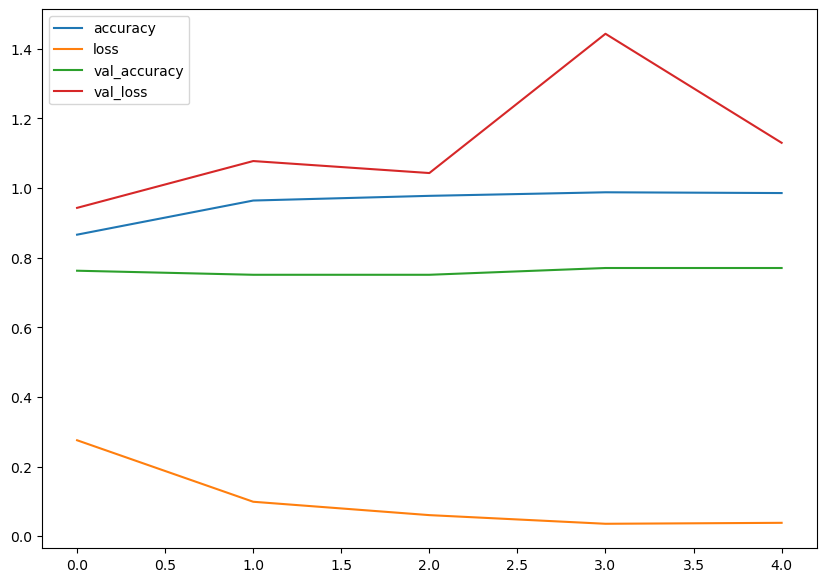

In [ ]:
plot_loss_curves(history_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
RESULT: Bleached (Class 0)
Confidence: 66.71%


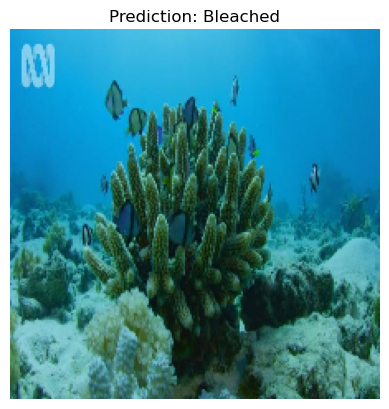

In [ ]:
# 2. FIX: Change target_size to (224, 224) to match your model's input_shape
img = tf.keras.utils.load_img(
    "Coral Reef Images/valid/Healthy/" + random.sample(os.listdir("Coral Reef Images/valid/Healthy"), 1)[0], 
    target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = img_array / 255.0 # Normalize pixel values

# 3. Make Prediction
predictions = model_1.predict(img_array)
score = predictions[0][0]

# 4. FIX: Update labels to match your Coral Reef dataset
# Note: Check your class_indices to be sure which is 0 and which is 1.
# Usually, 0 is the first folder alphabetically (e.g., Bleached) and 1 is the second (e.g., Healthy).
if score > 0.5:
    print(f"RESULT: Healthy (Class 1)") 
    print(f"Confidence: {100 * score:.2f}%")
else:
    print(f"RESULT: Bleached (Class 0)")
    print(f"Confidence: {100 * (1 - score):.2f}%")

# 5. Display Image
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {'Healthy' if score > 0.5 else 'Bleached'}")
plt.show()